In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig
from sklearn.metrics import silhouette_score

In [2]:
class Kmeans:
    def __init__(self,k,itr=300):
        self.k=k
        self.itr=itr
        self.labels=None
        self.centroids=None
        self.sil=None
        self.iner=None
        
    def fit(self,data):
        self.centroids = (data.sample(n=self.k)).T
        
        for i in range(self.itr):
            distances = self.centroids.apply(lambda x: np.abs(((data - x)).sum(axis=1)))
            self.labels = np.argmin(distances, axis=1)
            self.centroids = data.groupby(self.labels).mean().T
        
        distances = self.centroids.apply(lambda x: np.abs(((data - x)).sum(axis=1)))
        self.iner = np.sum(distances.min(axis=1))
        self.sil = silhouette_score(data, self.labels)

In [3]:
class PCA:
    def __init__(self):
        self.data=None
        self.feature_vector=None
        self.var_ratio=None
        
    def fit(self,df):
        total=0
        self.data=df
        vals, vecs = eig(np.cov(self.data, rowvar=False))
        
        #Sorting the Vector matrix from highest -> lowest
        sortidx = np.argsort(vals)[::-1]
        vals = vals[sortidx]
        vecs = vecs[:, sortidx]
        
        #Finding the Feature vector and Variance ratios
        self.feature_vector =vecs.T
        self.var_ratio=vals/np.sum(vals)
        
        for i in range(len(vecs.T)):
            total+=self.var_ratio[i]
            if(total>.85):
                break
        return i+1

In [4]:
df = pd.read_csv("./data.csv", index_col='country')
means= np.mean(df, axis=0)
stds= np.std(df, axis=0)
df=(df-means)/stds

In [5]:
pmodel = PCA()
pca_count=pmodel.fit(df)
pdata = np.dot(pmodel.feature_vector,df.T).T
print(f"Number of PC's taken : {pca_count}")
final_data = pd.DataFrame(pdata[:,:pca_count])

Number of PC's taken : 4


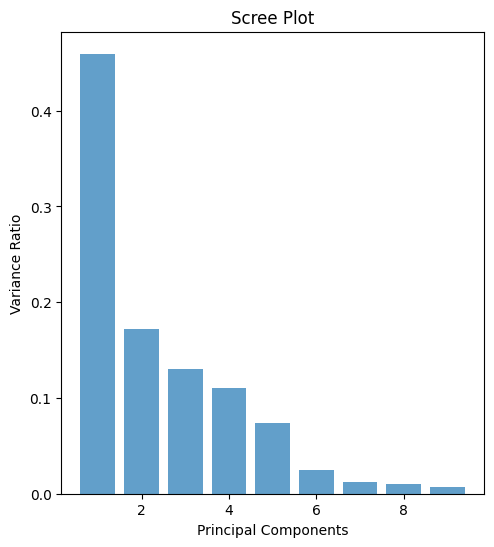

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.bar(range(1, len(pmodel.var_ratio) + 1), pmodel.var_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')
plt.show()

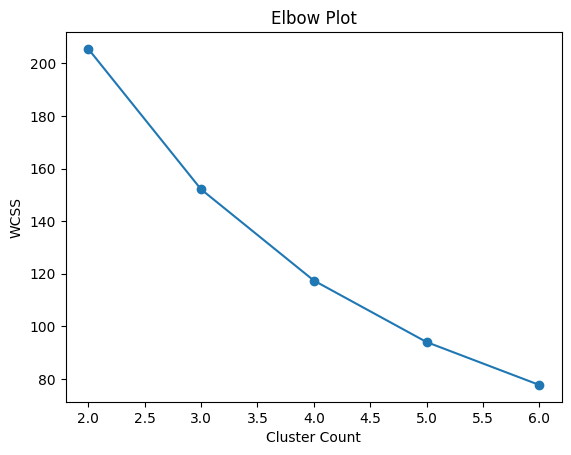

In [7]:
scores=[]
for i in range(2,7):
    model = Kmeans(i,1000)
    model.fit(final_data)
    scores.append(model.iner)
plt.plot(range(2, 7), scores, marker='o')
plt.xlabel('Cluster Count')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [244]:
std_model = Kmeans(3,100)
std_model.fit(final_data)
print(std_model.sil)

0.2641277628873202


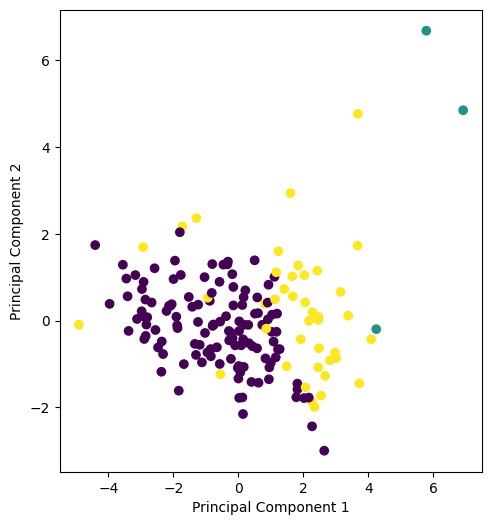

In [245]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(final_data[0], final_data[1], c=std_model.labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()